In [1]:
#
# prototype ogatabanks function
#
def ogatabanks(c_source,space,time,dispersion,velocity):
    from math import sqrt,erf,erfc,exp  # get special math functions
    term1 = erfc(((space-velocity*time))/(2.0*sqrt(dispersion*time)))
    term2 = exp(velocity*space/dispersion)
    term3 = erfc(((space+velocity*time))/(2.0*sqrt(dispersion*time)))
    print(term3)
    ogatabanks = c_source*0.5*(term1+term2*term3)
    return(ogatabanks)

5.733031437583892e-07
1.9928852633866985e-07
6.664089697085715e-08
2.1435180516621863e-08
6.631491956652328e-09
1.9731752900754024e-09
5.646316074086536e-10
1.553769516341967e-10
4.111577818799048e-11
1.0461915088289236e-11
2.55962508777167e-12
6.021255962234891e-13
1.3618449781240147e-13
2.9613074980096075e-14
6.190717543917407e-15
1.2441921148543639e-15
2.4038703085471545e-16
4.464786394576111e-17
7.971609925696384e-18
1.368161537187115e-18
2.2571768119076845e-19
3.5794976240281e-20
5.4563071426923016e-21
7.994442411452461e-22
1.12585646227532e-22
1.5239706048321186e-23
1.982725024512e-24
2.479331959168028e-25
2.9798022545929787e-26
3.442035678959576e-27
3.821319148997366e-28
4.0773350070897846e-29
4.18119084347711e-30
4.12078247231758e-31
3.9031145863391725e-32
3.552964224155404e-33
3.1082395727792427e-34
2.61323596624926e-35
2.1114451161772786e-36
1.6395123426326041e-37
1.2234328799099841e-38
8.77350542614852e-40
6.046315471890479e-41
4.004334447363078e-42
2.5485262910136937e-43
1.

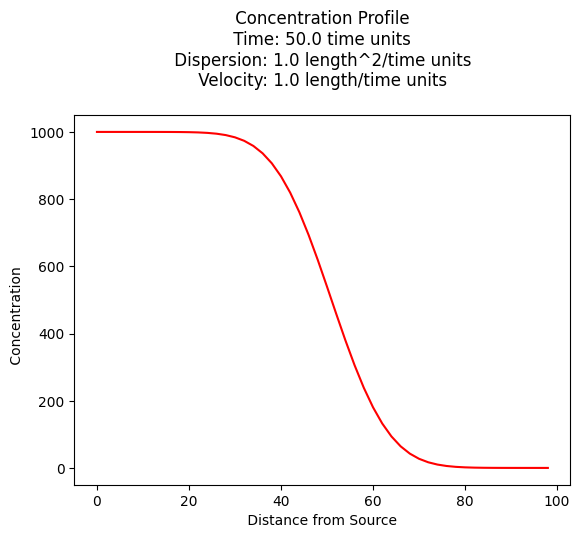

In [2]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 100.      # how far in X-direction to extend the plot
time  = 50.       # time since release
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

0.0
4.952126631006914e-149
2.949433113257988e-81
8.787880039809126e-59
1.2114989528830613e-47
4.846411842405321e-41
1.0404801339498303e-36
1.1242946645838765e-33
1.8735664705504999e-31
8.972385010735985e-30
1.7941524248040494e-28
1.9003332723789374e-27
1.2494563672702272e-26
5.691873392179496e-26
1.9432711659535435e-25
5.267118704691593e-25
1.1834353814731251e-24
2.278277449781446e-24
3.855947703432936e-24
5.855188239681595e-24
8.107671698367187e-24
1.0373234658249127e-23
1.2395783470276733e-23
1.395859548981437e-23
1.49224472995004e-23
1.5239706048321186e-23
1.4946615517744525e-23
1.4141363706883272e-23
1.2956737967756765e-23
1.1534510708533014e-23
1.0005820770300741e-23
8.479025945460384e-24
7.034487747459961e-24
5.724668335212883e-24
4.577612916653271e-24
3.6020833685826365e-24
2.793037343442723e-24
2.136620622905555e-24
1.6142490169327249e-24
1.2056553641217127e-24
8.909652524634083e-25
6.519616607890451e-25
4.7273043524457995e-25
3.3987035143440443e-25
2.4242305745001693e-25
1.716

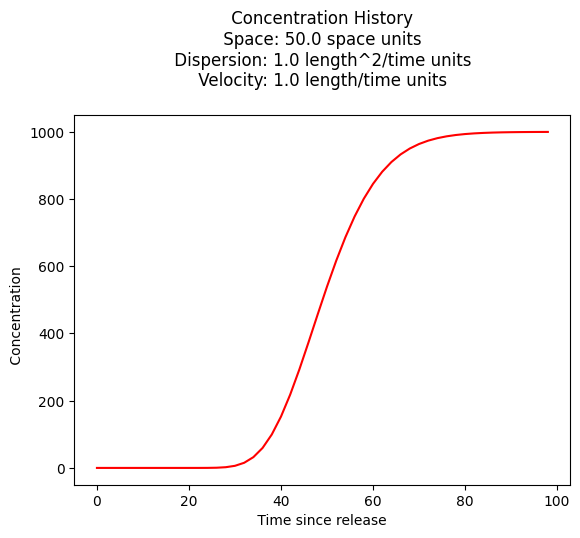

In [3]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 50.      # where in X-direction are we
time  = 100.      # how far in T-direction to extend the plot
dispersion = 1.0  # dispersion coefficient
velocity = 1.0    # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 50   
deltat = time/how_many_points
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation

t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,space,t[i],dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Space: " + repr(space) + " space units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Time since release ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

1.0432523079828371e-10
3.70717309820489e-11
1.2867718381422252e-11
4.3627157057623855e-12
1.4447774727577688e-12
4.673326706246197e-13
1.4764723869713558e-13
4.556084612044626e-14
1.3731536068160933e-14
4.042046584808178e-15
1.1620709252130692e-15
3.2629292401490343e-16
8.947902056656552e-17
2.396450351771896e-17
6.268225936633244e-18
1.601199364275134e-18
3.994537631754774e-19
9.732041328750892e-20
2.3155483679361915e-20
5.380375606400359e-21
1.2208903575350298e-21
2.705470009804643e-22
5.854739596363408e-23
1.2372805546281317e-23
2.553416215403102e-24
5.145944007202974e-25
1.0127350394013818e-25
1.9463071492538337e-26
3.65265968833764e-27
6.694019404311472e-28
1.1979601371113114e-28
2.0935012453742212e-29
3.572542743921763e-30
5.953234279792017e-31
9.687191769686667e-32
1.539254136265097e-32
2.3882977233686734e-33
3.6185165517812283e-34
5.353464766133088e-35
7.733925828943795e-36
1.090998528733104e-36
1.5028164109253448e-37
2.021360805096524e-38
2.654828639134684e-39
3.40472886135747

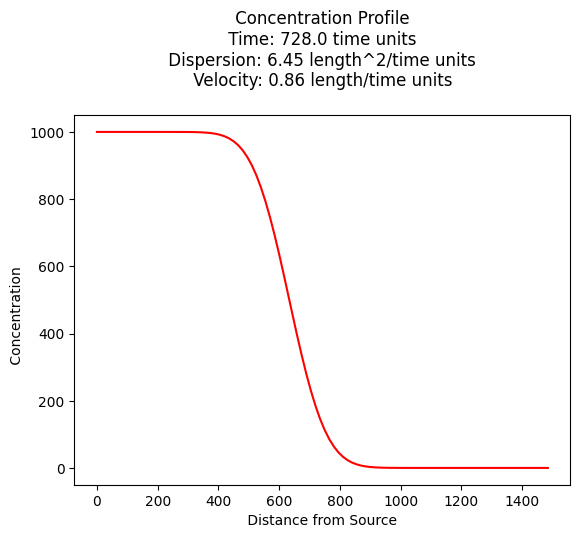

9.183521849997486e-46
Concentration at x = 750, t = 728 : 112.838  mg/L


In [4]:
#
# example inputs
#
c_source = 1000.0 # source concentration
space = 1500.      # how far in X-direction to extend the plot
time  = 728.       # time since release
dispersion = 6.45  # dispersion coefficient
velocity = 0.86   # pore velocity
#
# forward define and initialize vectors for a profile plot
#
how_many_points = 100   
deltax = space/how_many_points
x = [i*deltax for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
#
# build the profile predictions
#
for i in range(0,how_many_points,1):
    c[i] = ogatabanks(c_source,x[i],time,dispersion,velocity)
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(time) + " time units \n" + " Dispersion: " + repr(dispersion) + " length^2/time units \n" + " Velocity: " + repr(velocity) + " length/time units \n") # caption the plot object
plt.xlabel(" Distance from Source ") # label x-axis
plt.ylabel(" Concentration        ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

print("Concentration at x = 750, t = 728 :",round(ogatabanks(c_source,750.0,728.0,dispersion,velocity),3)," mg/L")